In [1]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa
from padasip.filters.fxlms import FilterFxLMS
import wavio

In [2]:
# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target

In [3]:
# identification
f = FilterFxLMS(n=4, mu=0.1, w="random")
y, e, w = f.run(d, x)

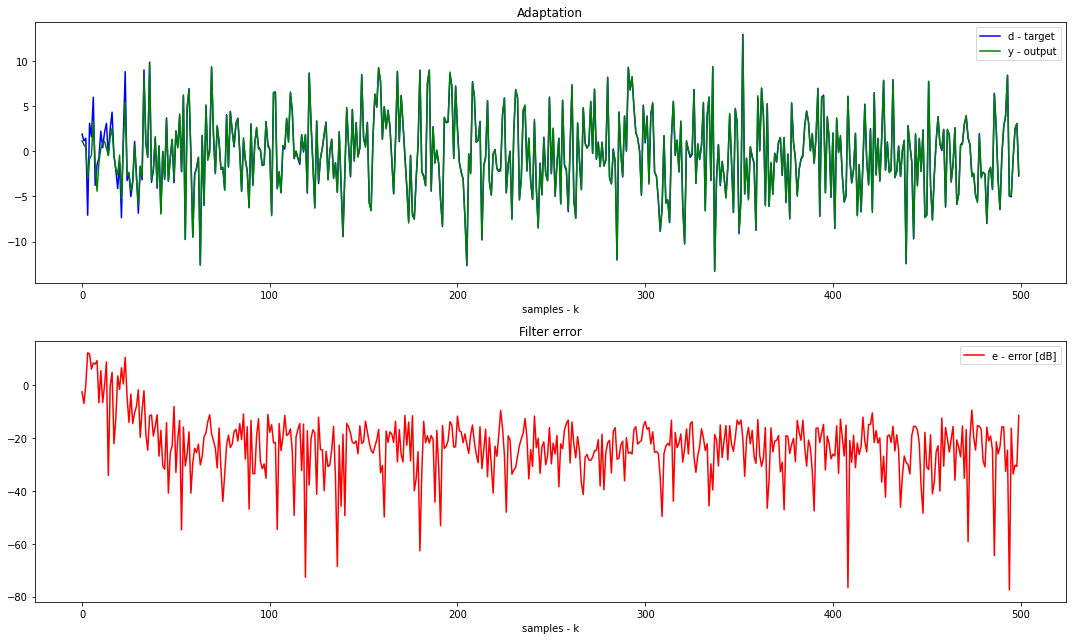

In [4]:
## show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

In [5]:
music_raw = wavio.read("music/music.wav")
room_drum_raw = wavio.read("music/drum_room.wav")
drum_raw = wavio.read("music/drum.wav")

music = music_raw.data[:, 0]
music = music.astype(np.float32, order='C') / 32767.0

room_drum = room_drum_raw.data[:, 0]
room_drum = room_drum.astype(np.float32, order='C') / 32767.0

drum = drum_raw.data[:, 0]
drum = drum.astype(np.float32, order='C') / 32767.0

In [7]:
x = np.transpose([drum[:219424], room_drum[:219424]])
d = np.transpose([music[:219424]])

In [8]:
# identification
f = FilterFxLMS(n=2, mu=0.1, w="random")
y, e, w = f.run(d, x)

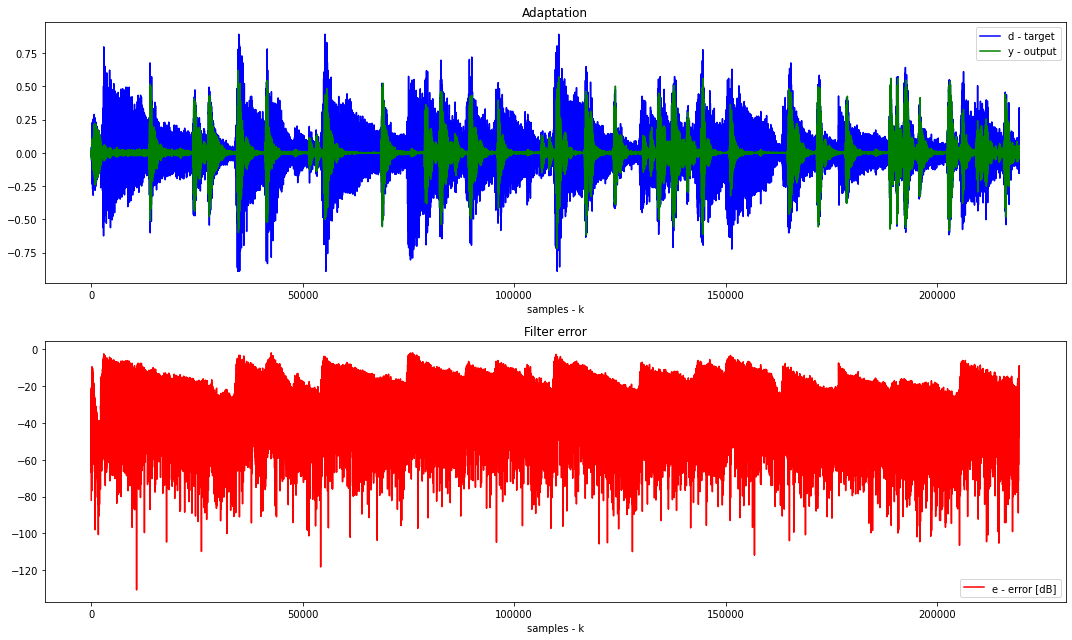

In [9]:
## show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

In [10]:
wavio.write("fxlms.wav", e, 16000, sampwidth=3)